In [67]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
# drop columns with 50% data missing

threshold = len(df) * 0.5
new_df = df.dropna(thresh=threshold, axis=1)


In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [72]:
new_df.replace('?', np.NaN)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [73]:
null_vals = new_df.isnull().sum()
null_vals[null_vals > 0]

,0
LotFrontage,259
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
FireplaceQu,690
GarageType,81


In [74]:
# fill the columns having null rows with appropriate average of that column or mode in case of categorical column

for column in new_df.columns:
  if new_df[column].dtype == 'object':
    new_df[column].fillna(new_df[column].mode()[0], inplace=True)
  else:
    new_df[column].fillna(new_df[column].mean(), inplace=True)


<ipython-input-74-fc9719706d8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column].fillna(new_df[column].mean(), inplace=True)
<ipython-input-74-fc9719706d8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column].fillna(new_df[column].mode()[0], inplace=True)


In [75]:
# Standardize the data

from sklearn.preprocessing import StandardScaler

# Separate numerical features and target column
numerical_features = new_df.select_dtypes(include=np.number).drop('SalePrice', axis=1)
target_column = new_df['SalePrice']
categorical_features = new_df.select_dtypes(include='object')

# Standardize numerical features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with standardized features and target column
standardized_df = pd.DataFrame(standardized_features, columns=numerical_features.columns)
standardized_df['SalePrice'] = target_column

# Concatenate standardized features with categorical features
final_df = pd.concat([standardized_df, categorical_features], axis=1)


In [78]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [106]:
# ANOVA Test to find significant categorical variables with p-values < 0.05

import statsmodels.formula.api as smf

significant_columns = []
for column in final_df.select_dtypes(include='object').columns:
  # Create a formula for ANOVA test
  formula = f'SalePrice ~ C({column})'

  # Fit the model
  model = smf.ols(formula, data=final_df).fit()

  # Perform ANOVA test
  anova_table = sm.stats.anova_lm(model, typ=2)

  # Check if p-value is less than 0.05
  if anova_table['PR(>F)'].iloc[0] < 0.05:
    significant_columns.append((column, anova_table['PR(>F)'].iloc[0]))

print("Categorical columns with significant p-values (<0.05) in ANOVA test:")
print(significant_columns)


Categorical columns with significant p-values (<0.05) in ANOVA test:
[('MSZoning', 8.817633866272648e-35), ('LotShape', 6.447523852015111e-25), ('LandContour', 2.7422167521374613e-08), ('LotConfig', 3.1631674736044365e-06), ('Neighborhood', 1.5586002827688503e-225), ('Condition1', 8.904549416144104e-08), ('Condition2', 0.043425658360948464), ('BldgType', 2.0567364604967015e-10), ('HouseStyle', 3.376776535121486e-25), ('RoofStyle', 3.6535230471036686e-17), ('RoofMatl', 7.231444779976345e-08), ('Exterior1st', 2.5860887286413065e-43), ('Exterior2nd', 4.842185670692835e-43), ('ExterQual', 1.4395510967785439e-204), ('ExterCond', 5.106680608665449e-07), ('Foundation', 5.791895002233549e-91), ('BsmtQual', 2.0781200771251513e-194), ('BsmtCond', 7.166577741866081e-09), ('BsmtExposure', 5.394238431532024e-46), ('BsmtFinType1', 3.598398455132476e-66), ('BsmtFinType2', 0.035992986694944176), ('Heating', 0.0007534721064444824), ('HeatingQC', 2.667062092105115e-67), ('CentralAir', 1.8095061559266183

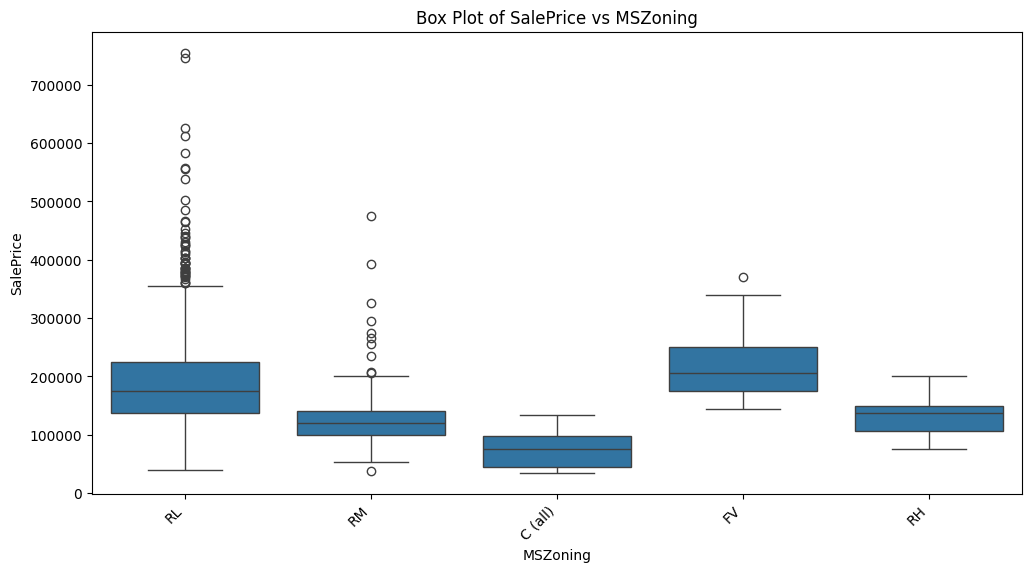

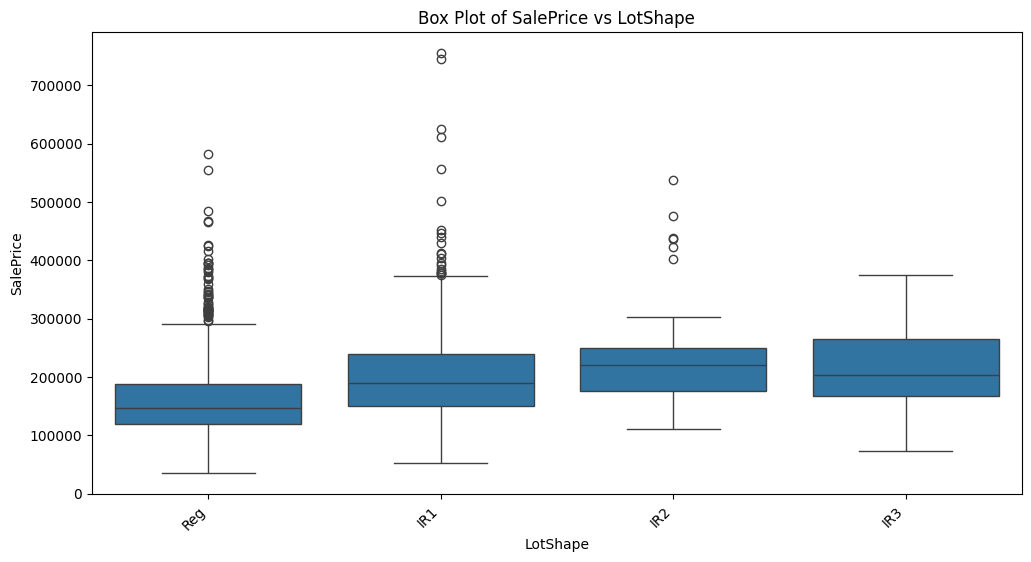

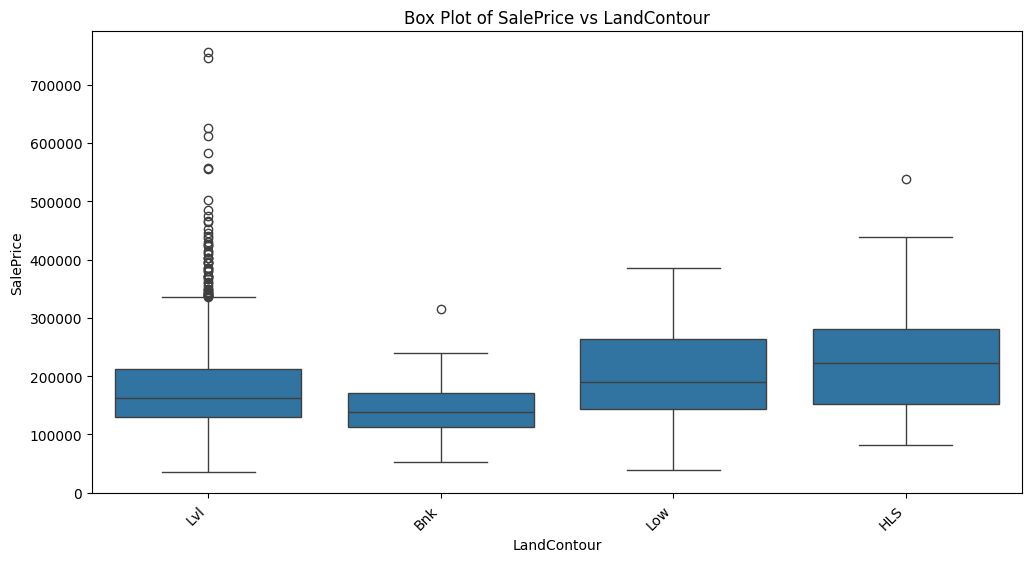

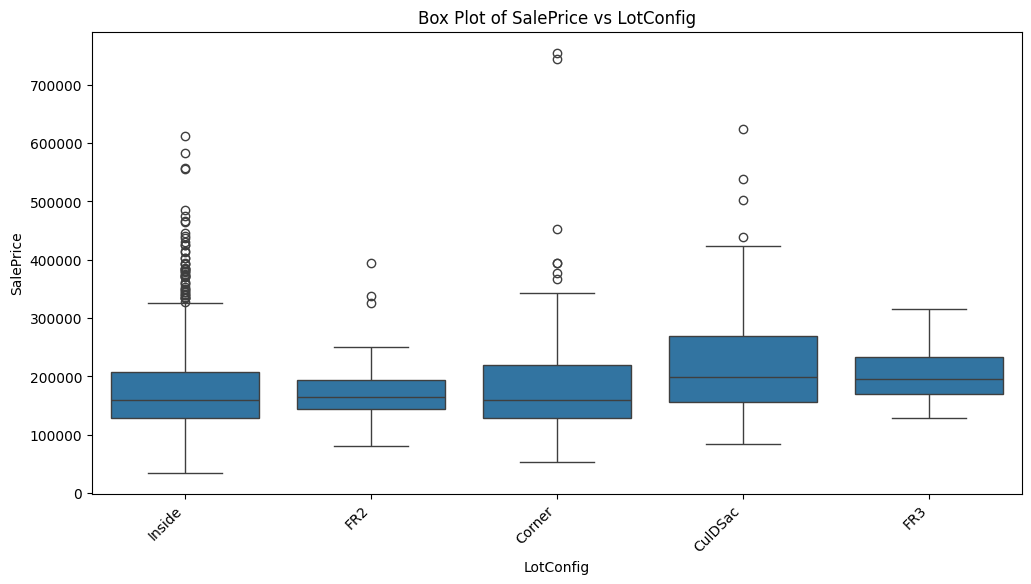

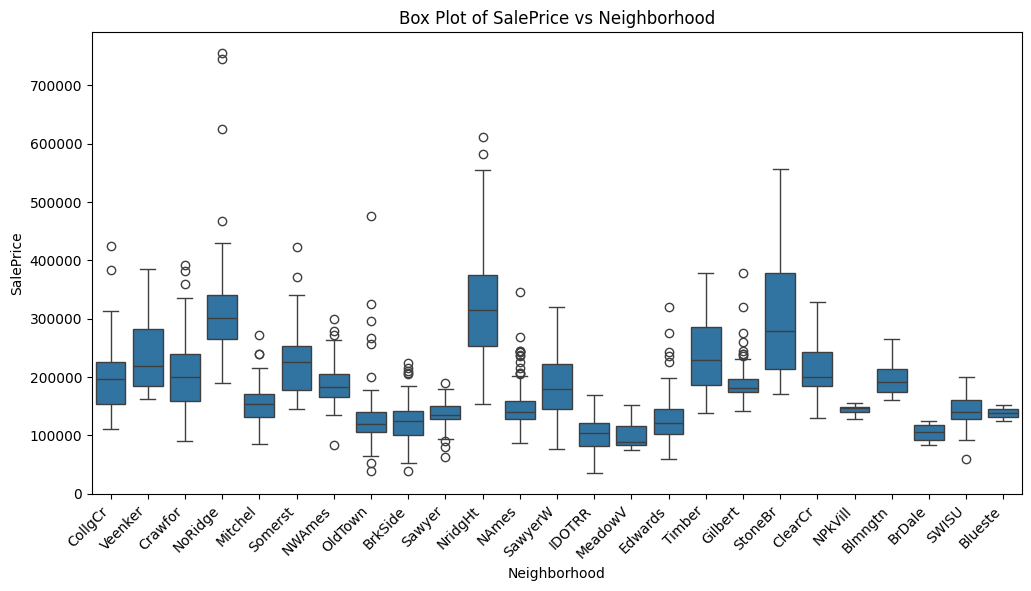

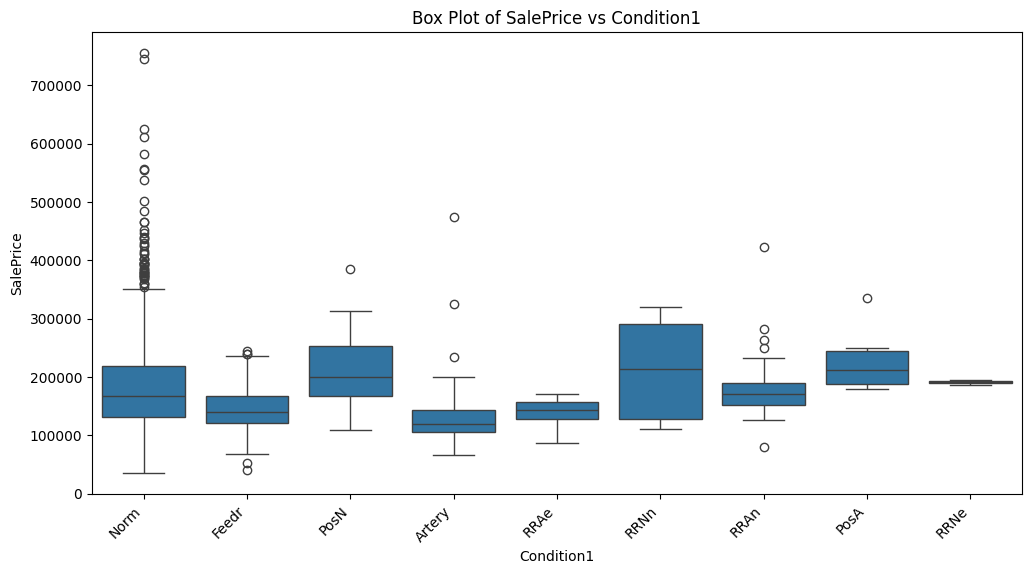

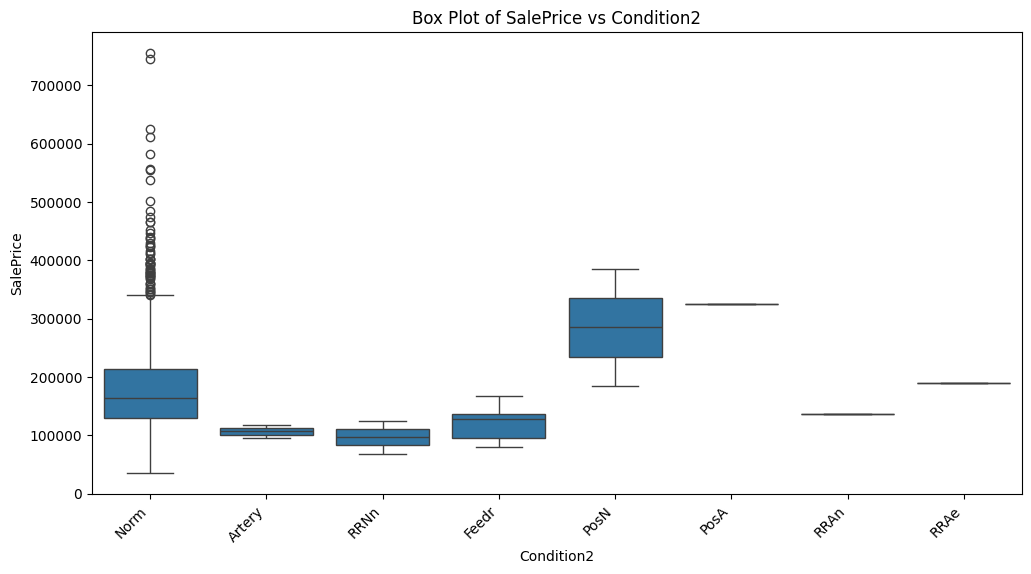

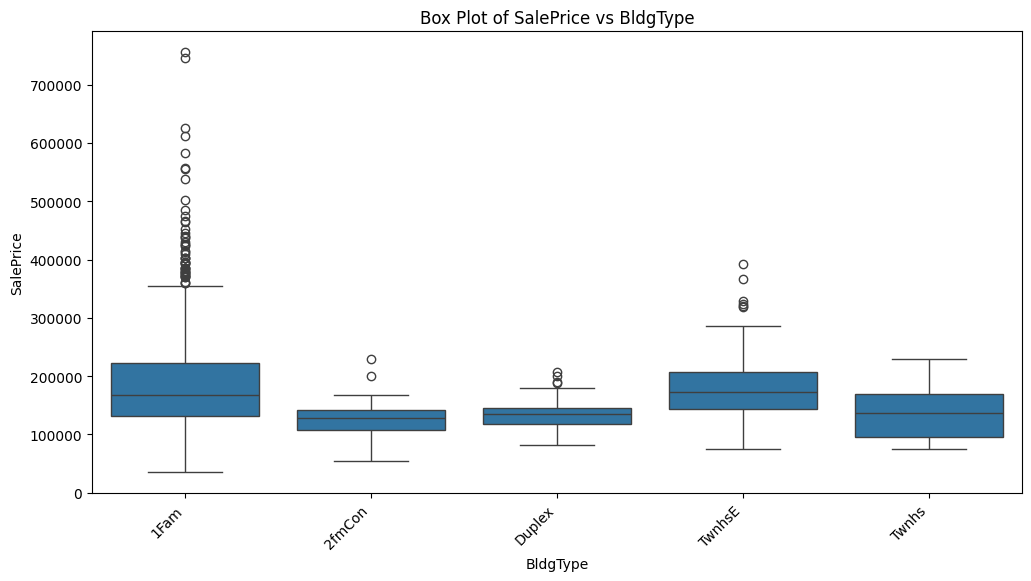

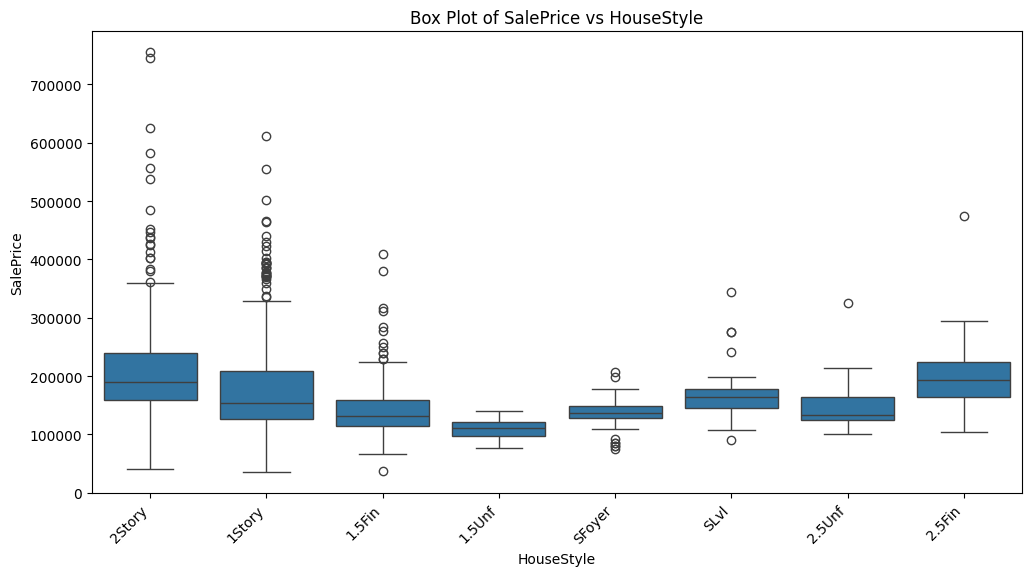

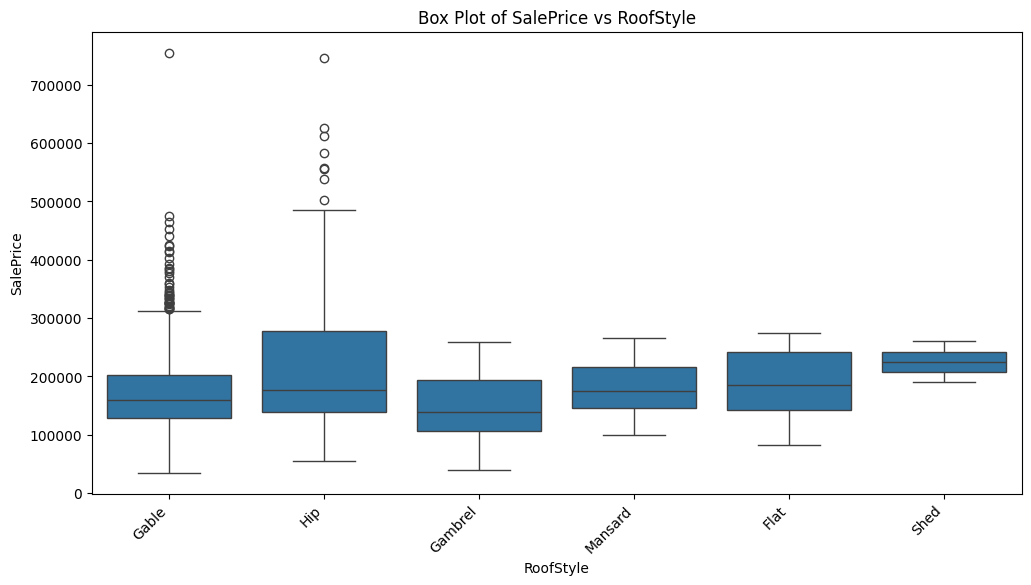

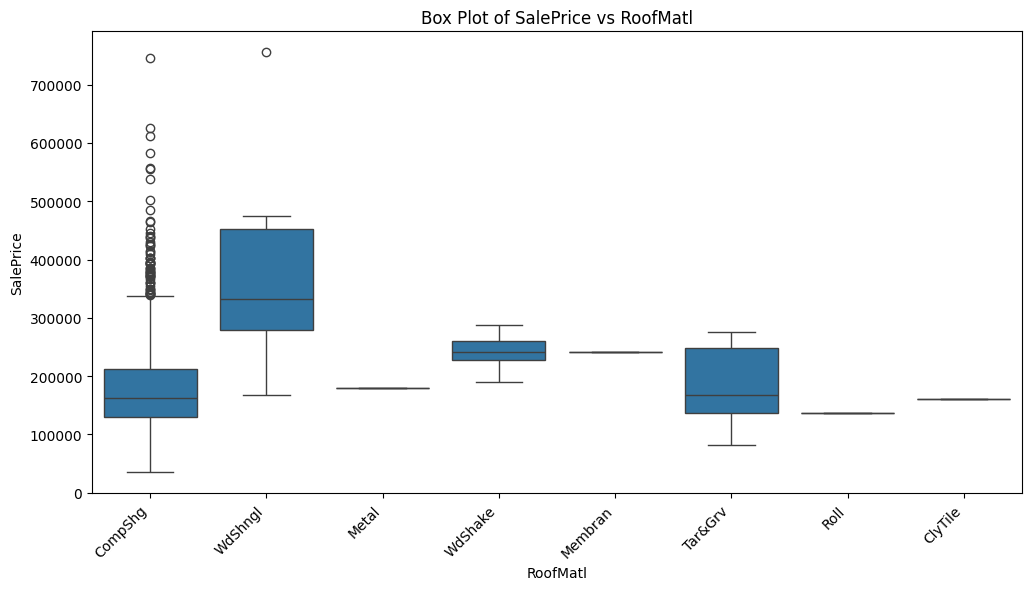

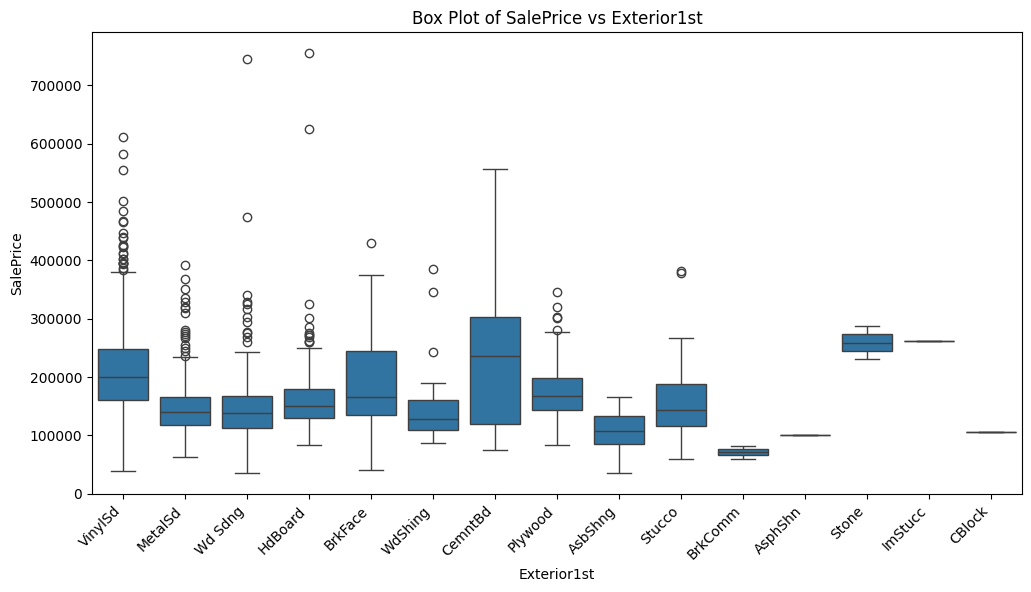

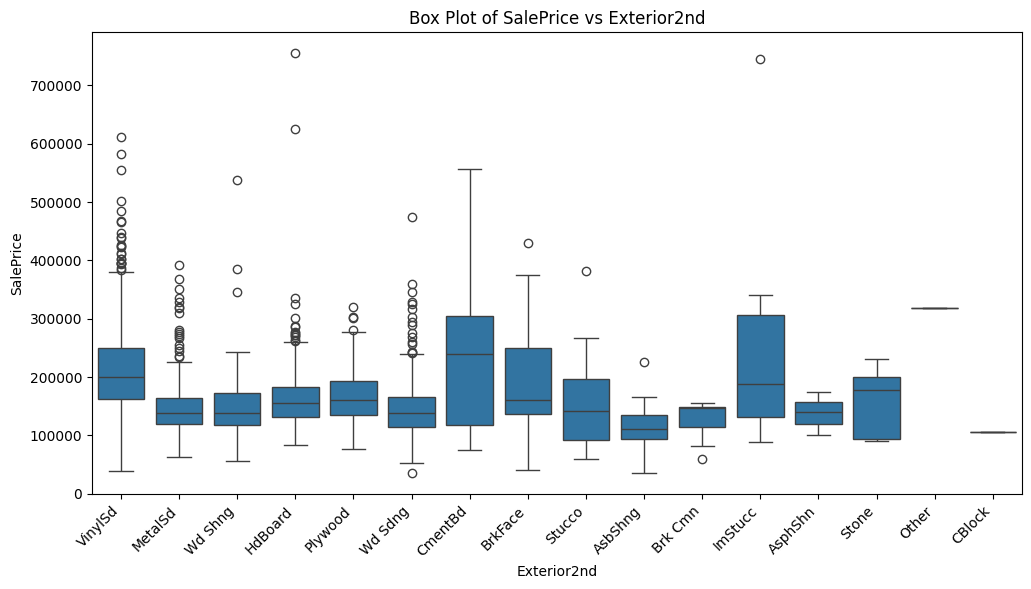

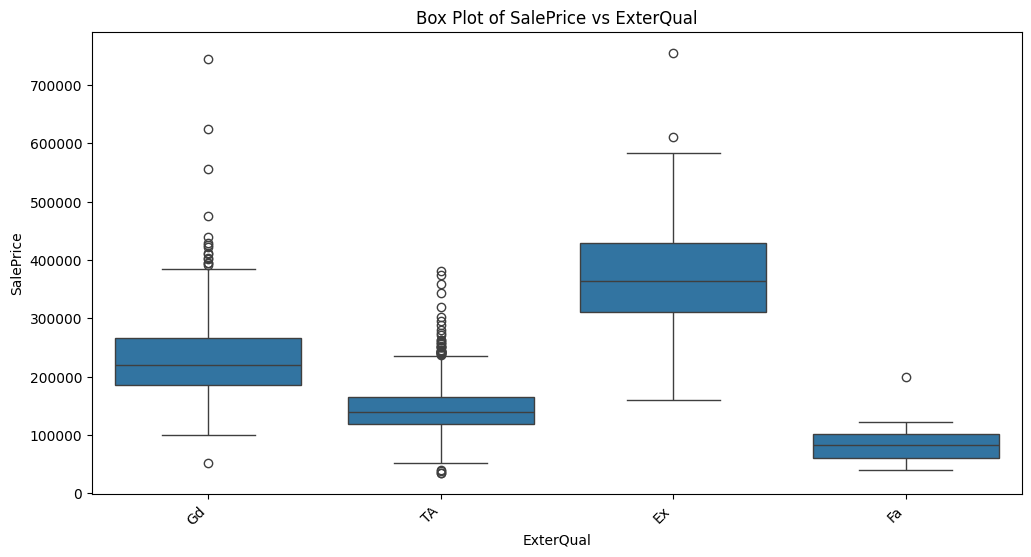

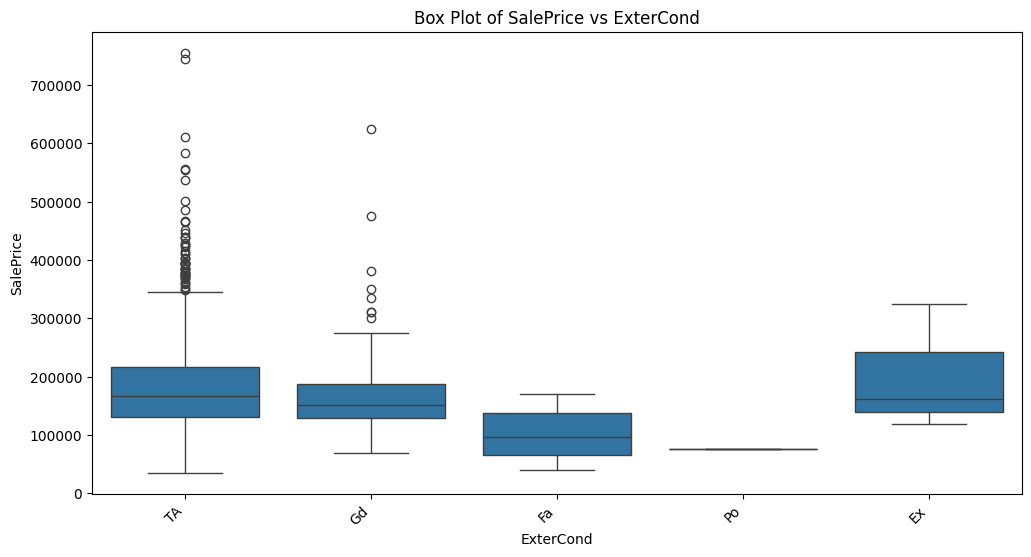

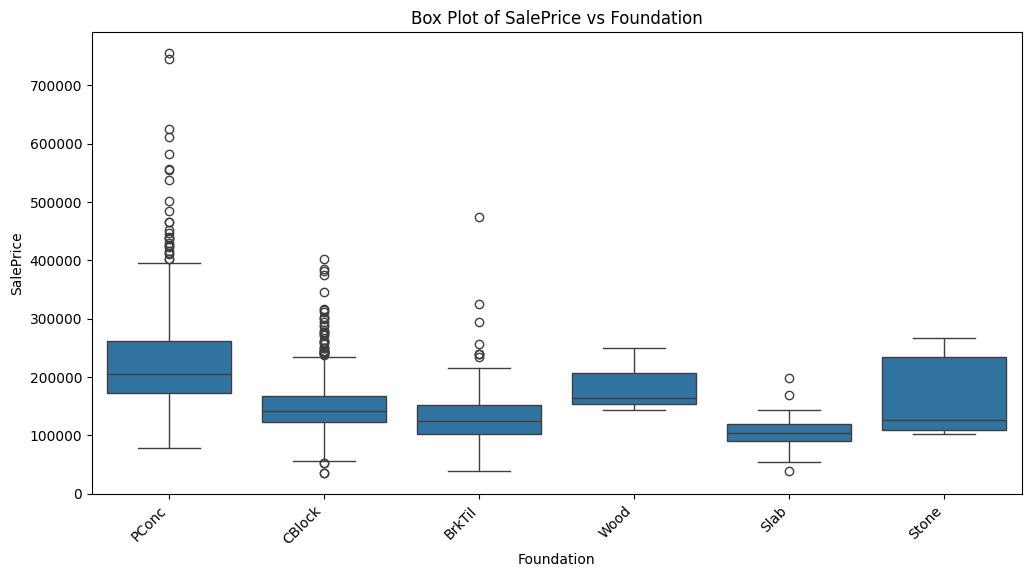

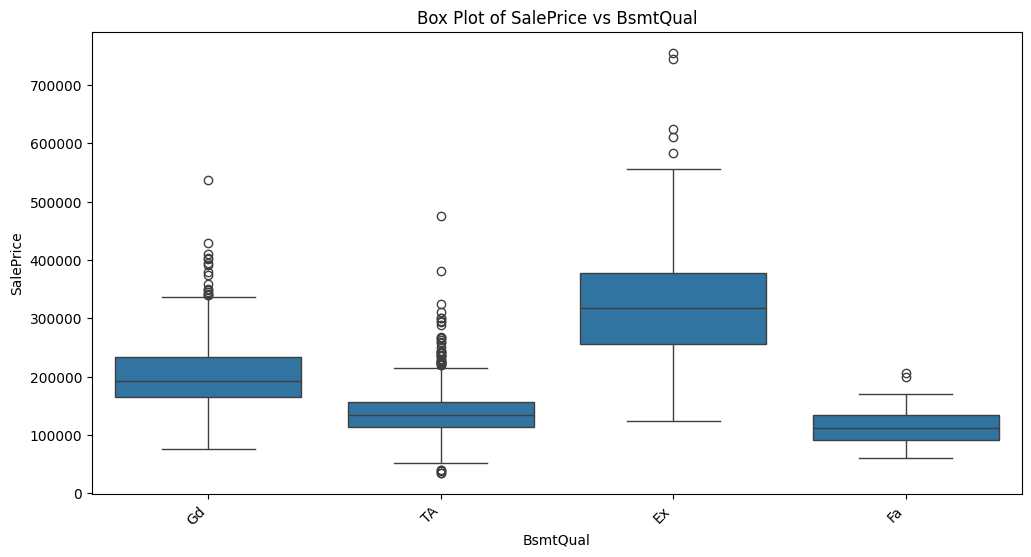

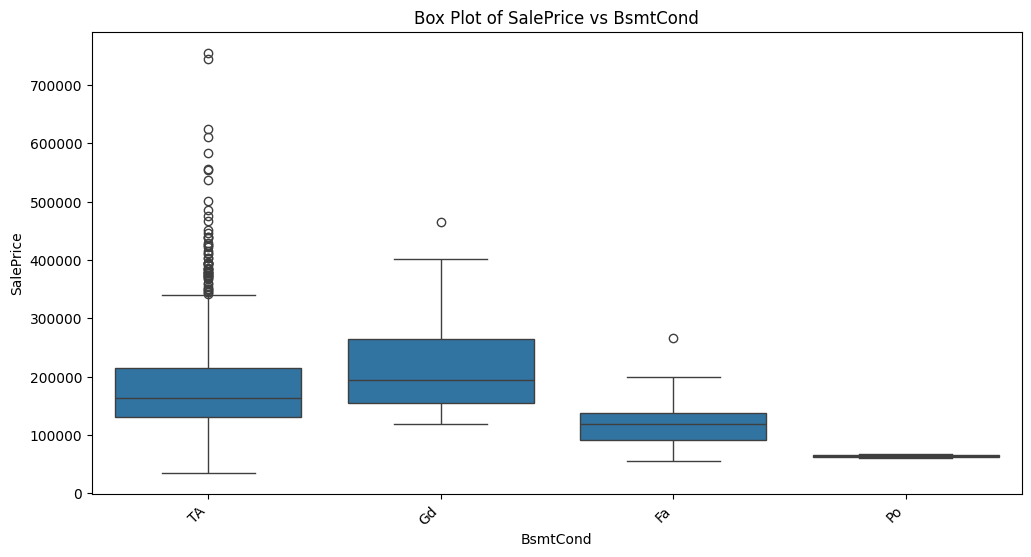

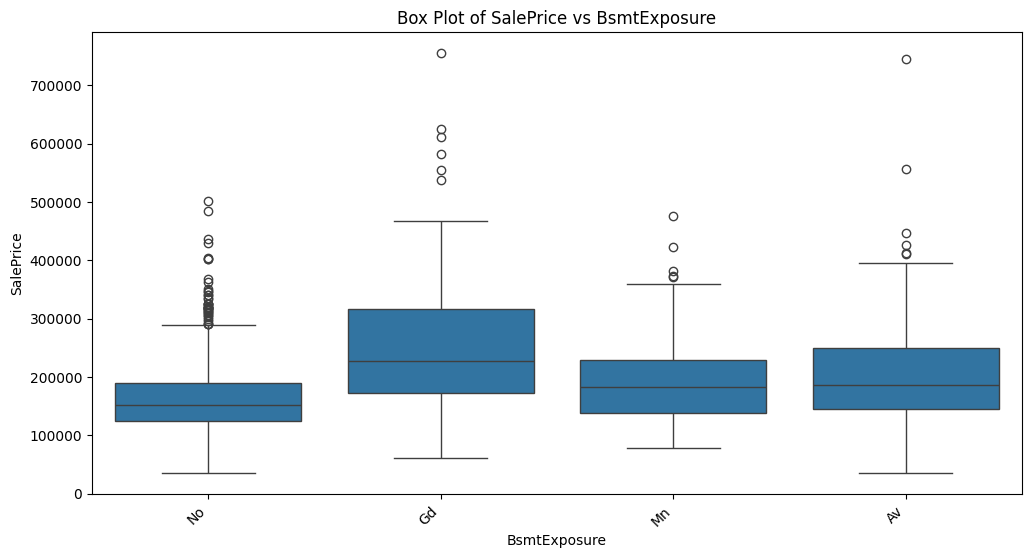

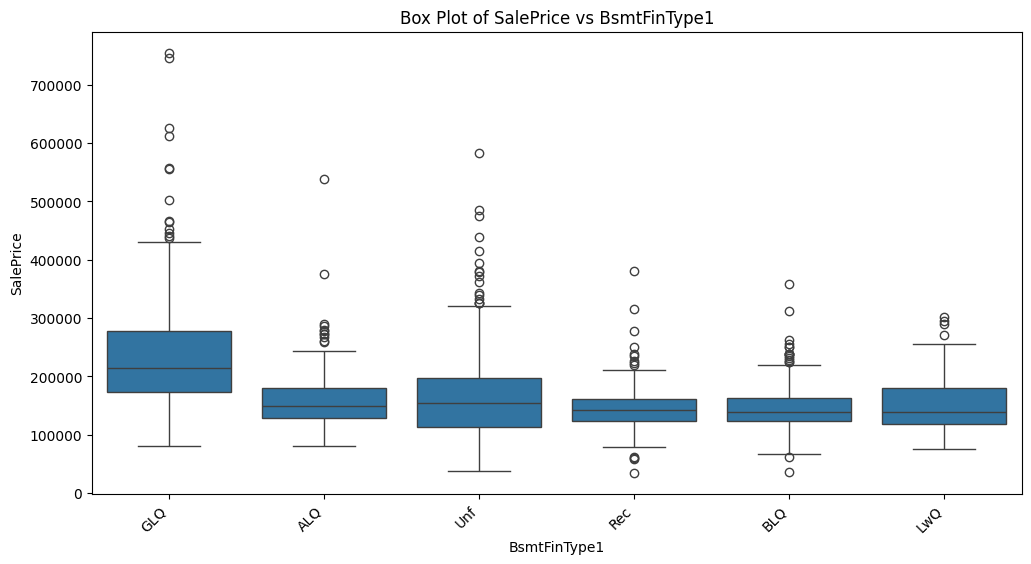

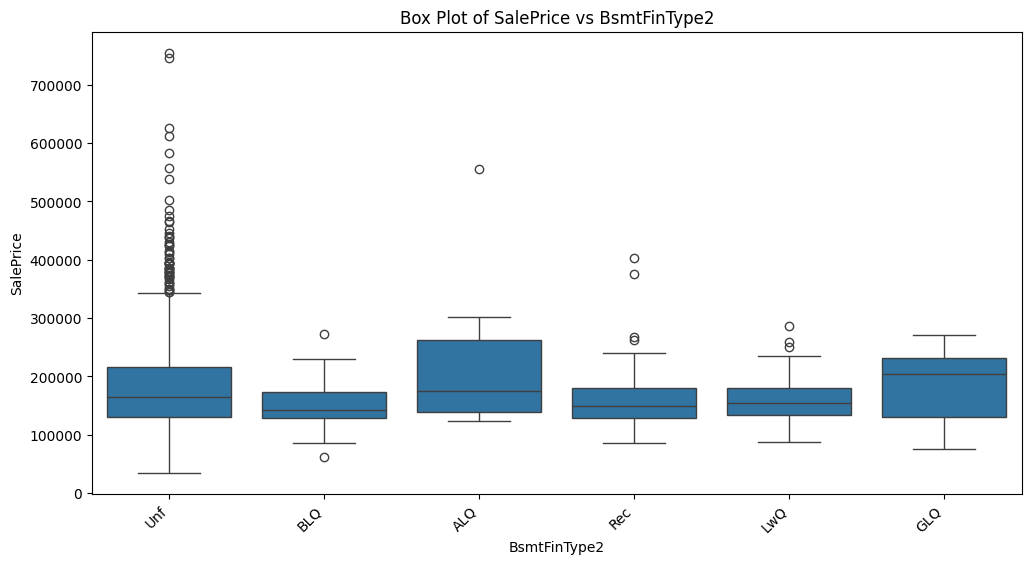

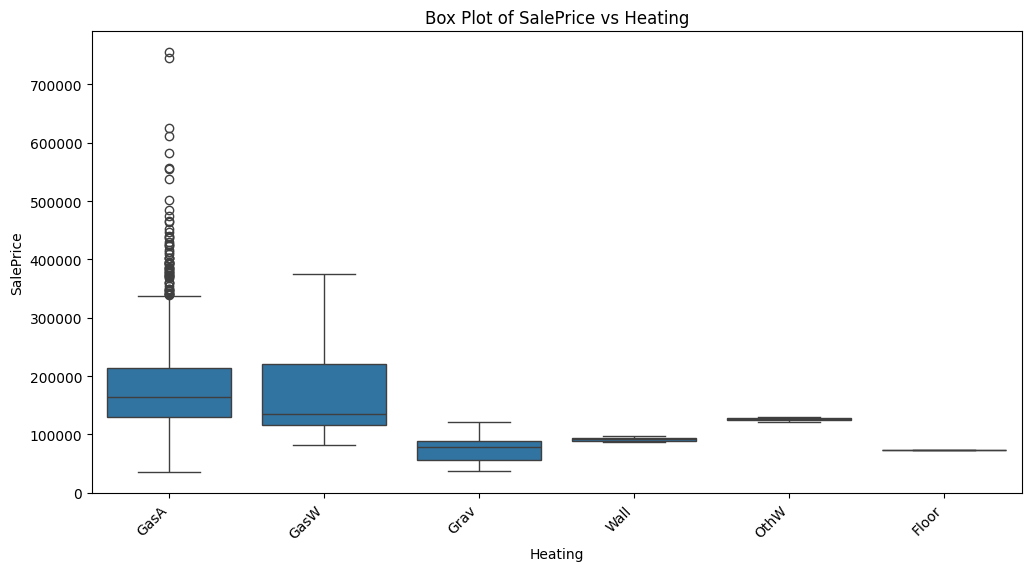

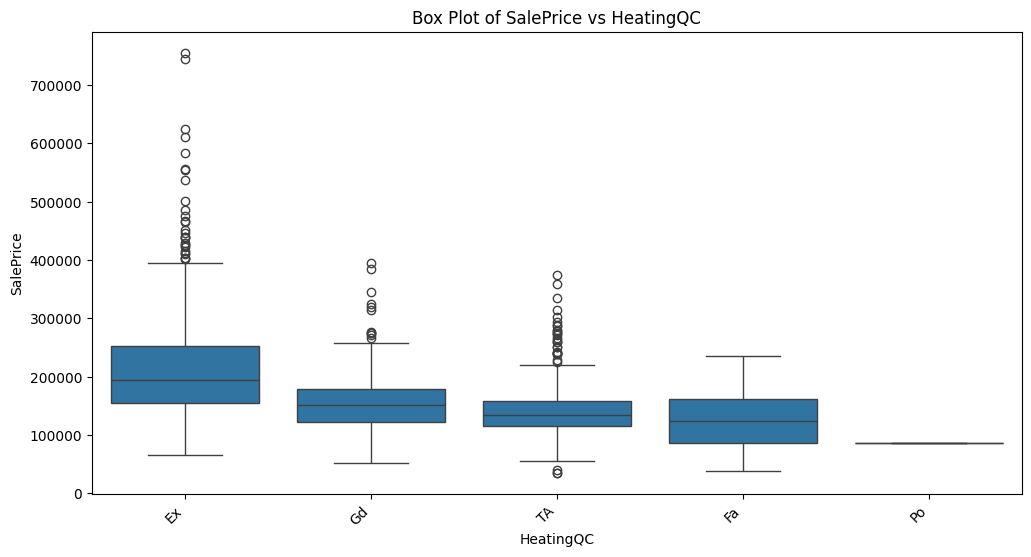

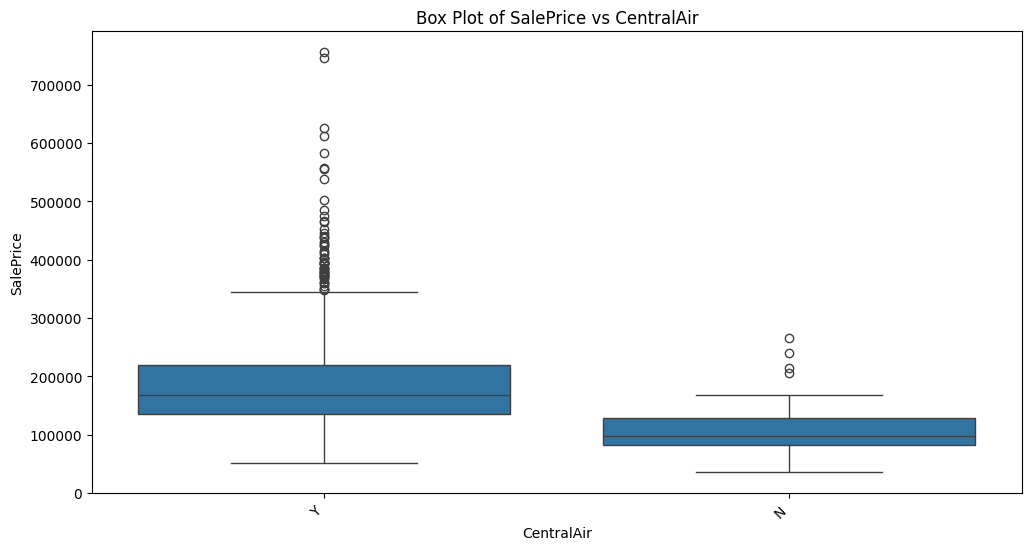

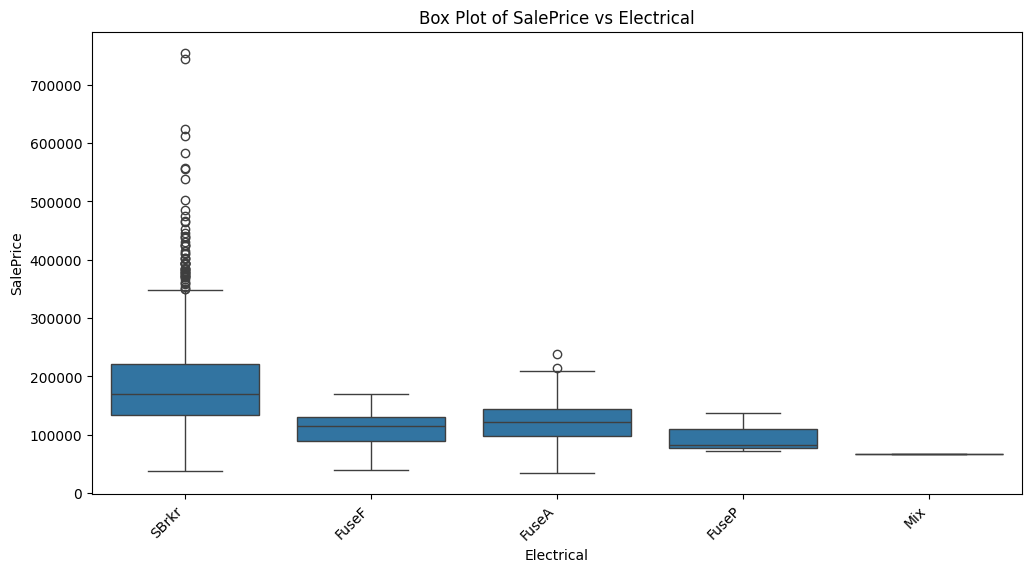

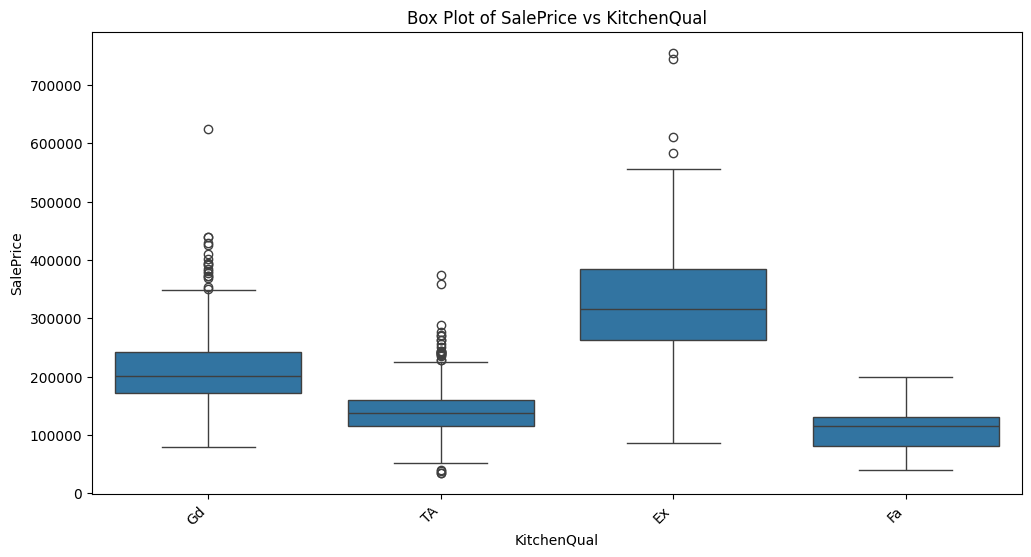

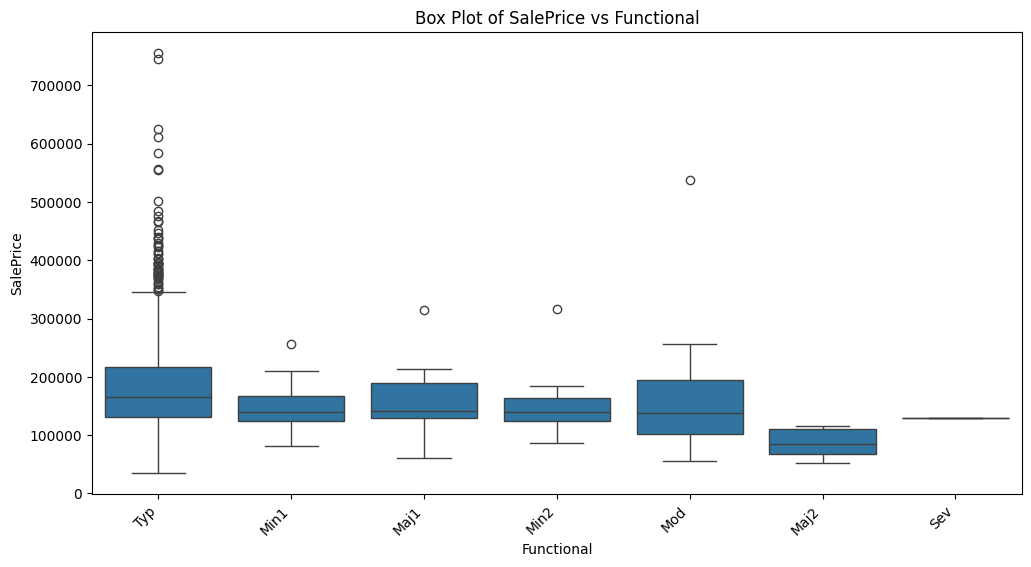

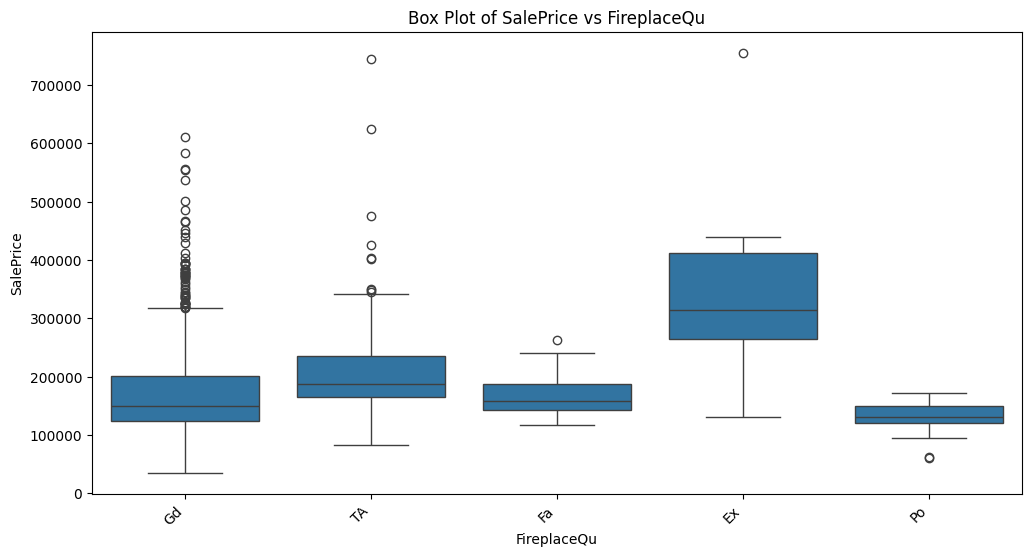

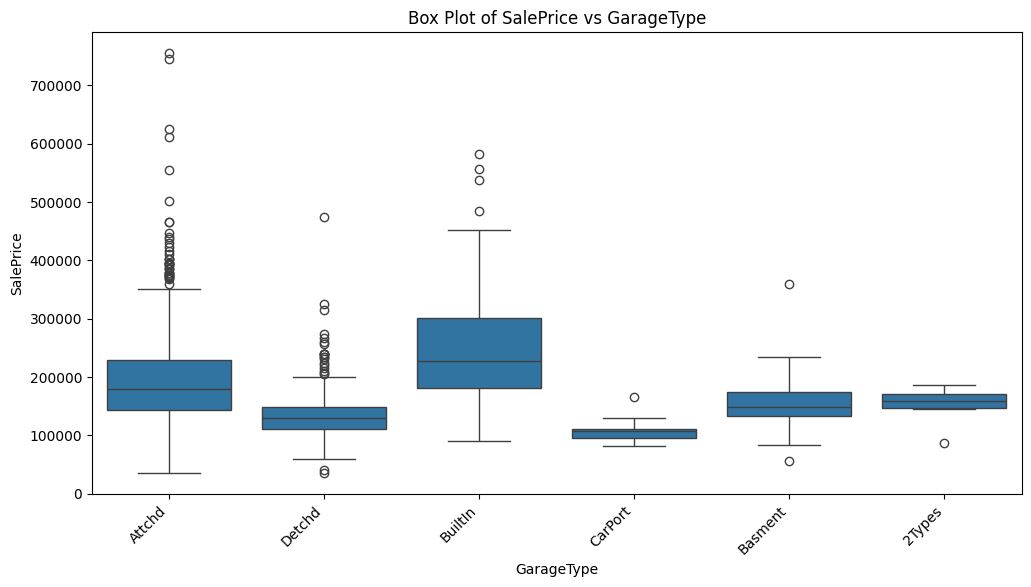

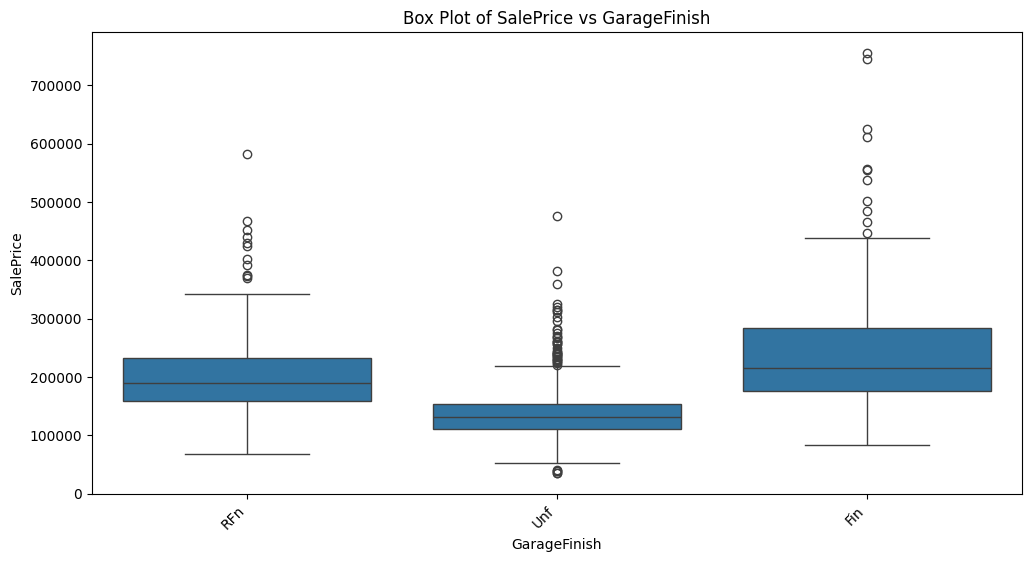

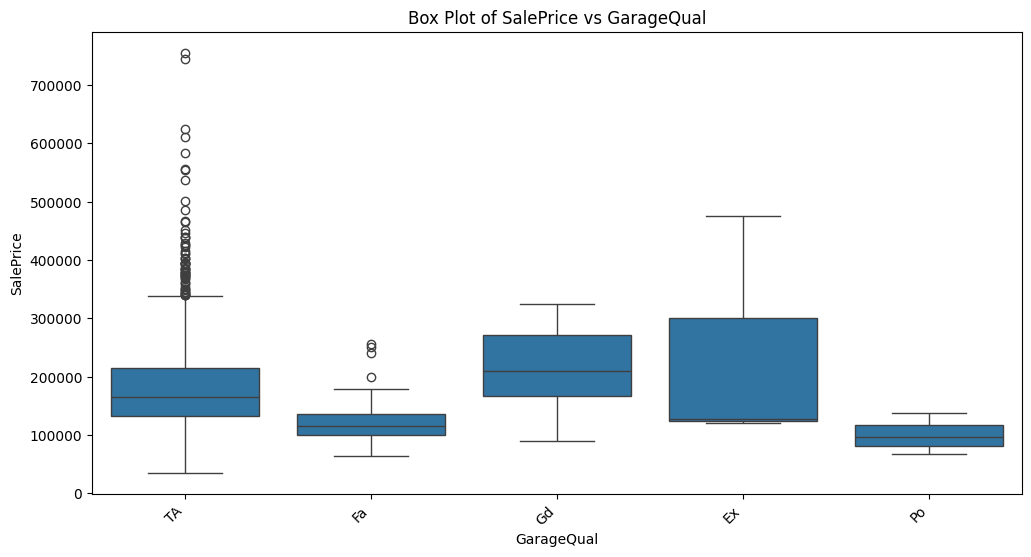

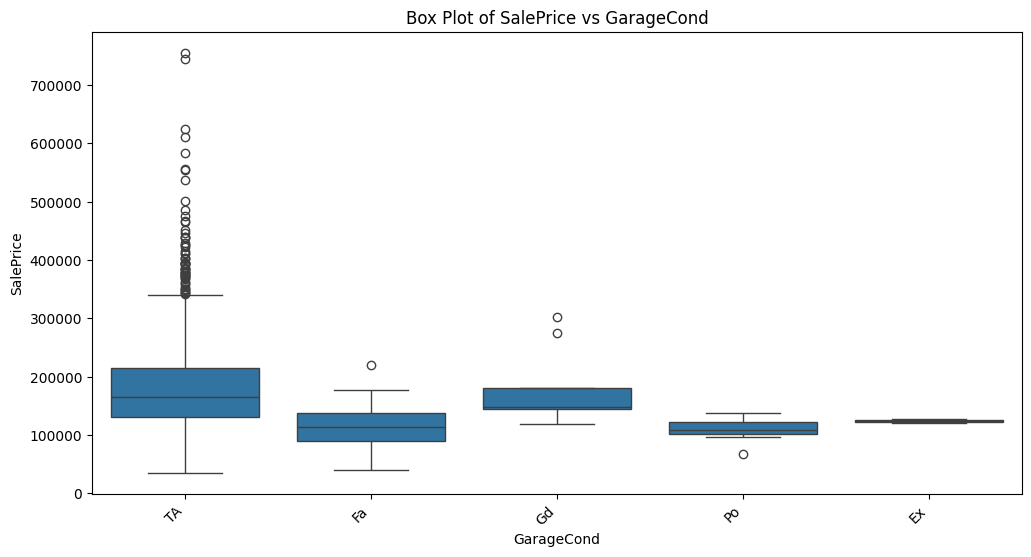

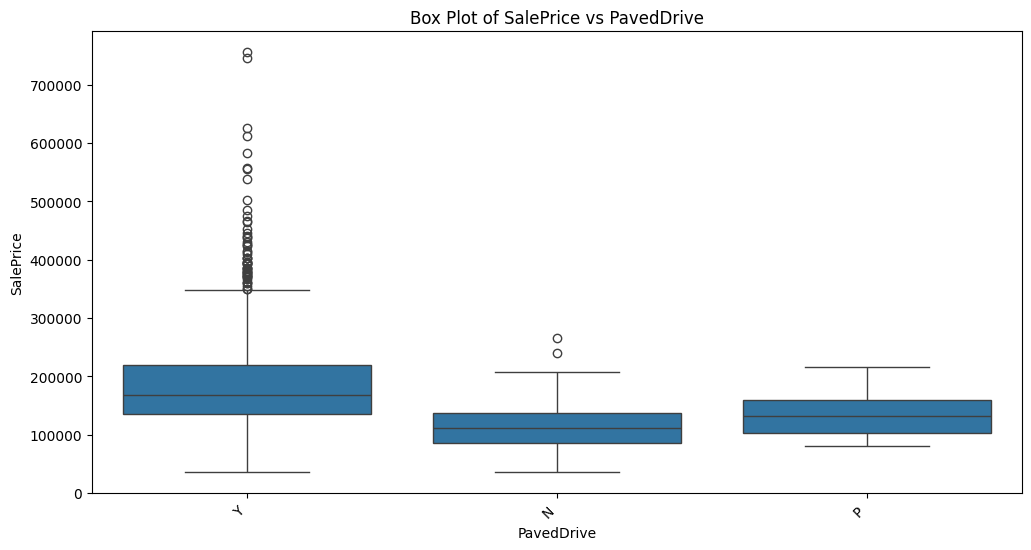

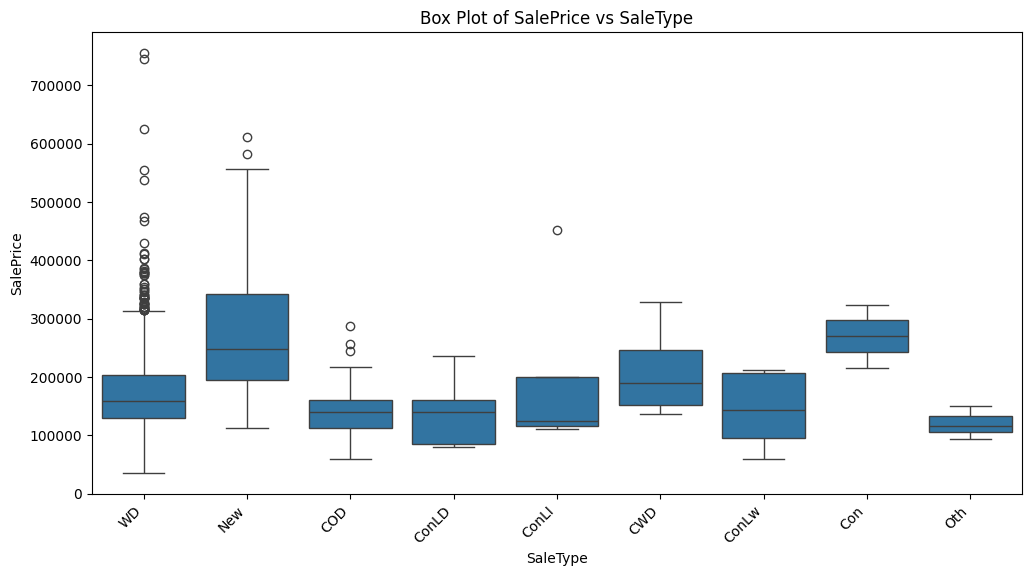

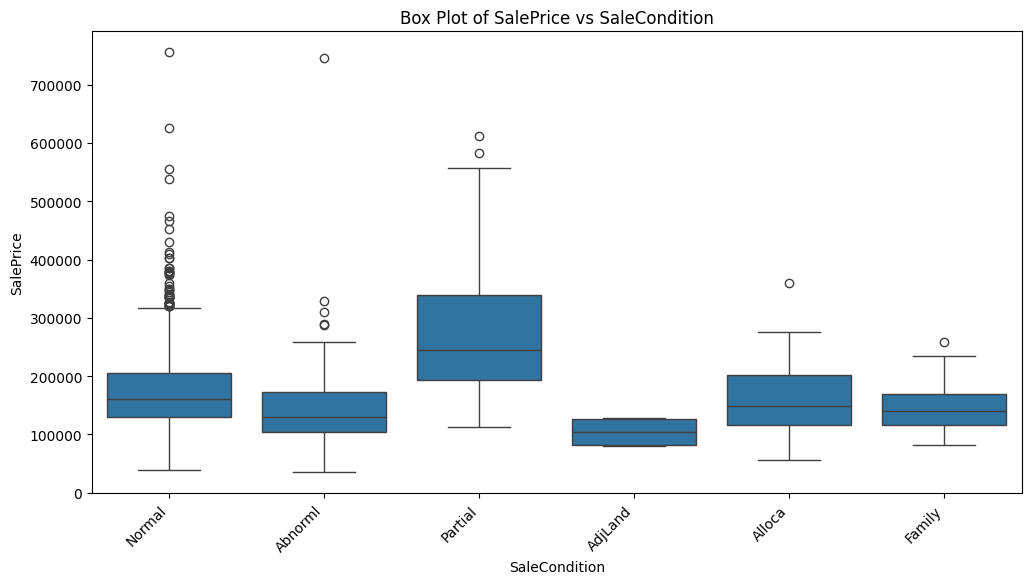

In [108]:
# Box Plot to verify the significance of the categorical variables on the target (if the median and quartiles across different categories differ with respect to target it is consider to be significant)

for column,_ in significant_columns:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x=column, y='SalePrice', data=final_df)
  plt.title(f'Box Plot of SalePrice vs {column}')
  plt.xticks(rotation=45, ha='right')
  plt.show()


In [109]:
# Dropping all insignificant categorical columns

significant_categorical_columns = [col for col, _ in significant_columns]
categorical_columns_to_drop = [col for col in final_df.select_dtypes(include='object').columns if col not in significant_categorical_columns]
final_df = final_df.drop(columns=categorical_columns_to_drop)


In [110]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
